<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_5_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.336800,200.960493,200.812751,0.147742
1,0.0,1.0,57.329540,67.934475,53.739469,0.867786,189.871270,188.913147,0.958123
2,0.0,2.0,45.215694,51.000161,43.520343,0.124364,149.860562,149.848413,0.012149
3,0.0,3.0,69.375325,41.455180,64.082408,-1.817048,183.095864,185.129554,-2.033690
4,0.0,4.0,87.837297,72.508079,90.676124,-0.198040,260.823461,260.844012,-0.020551
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.128871,52.821992,47.857948,0.831996,149.640806,148.470842,1.169964
19996,999.0,16.0,54.087773,71.546904,29.974359,-0.036082,165.572954,165.049553,0.523401
19997,999.0,17.0,68.944318,94.015145,59.585539,1.015772,233.560773,232.905936,0.654838
19998,999.0,18.0,51.662996,72.680956,79.621892,-0.345599,213.620245,214.567096,-0.946851


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.336800,200.960493,200.812751,0.147742
1,0.0,1.0,57.329540,67.934475,53.739469,0.867786,189.871270,188.913147,0.958123
2,0.0,2.0,45.215694,51.000161,43.520343,0.124364,149.860562,149.848413,0.012149
3,0.0,3.0,69.375325,41.455180,64.082408,-1.817048,183.095864,185.129554,-2.033690
4,0.0,4.0,87.837297,72.508079,90.676124,-0.198040,260.823461,260.844012,-0.020551
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.128871,52.821992,47.857948,0.831996,149.640806,148.470842,1.169964
19996,999.0,16.0,54.087773,71.546904,29.974359,-0.036082,165.572954,165.049553,0.523401
19997,999.0,17.0,68.944318,94.015145,59.585539,1.015772,233.560773,232.905936,0.654838
19998,999.0,18.0,51.662996,72.680956,79.621892,-0.345599,213.620245,214.567096,-0.946851


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.960493  200.812751  0.147742
      1.0    57.329540  67.934475  53.739469  ...  189.871270  188.913147  0.958123
      2.0    45.215694  51.000161  43.520343  ...  149.860562  149.848413  0.012149
      3.0    69.375325  41.455180  64.082408  ...  183.095864  185.129554 -2.033690
      4.0    87.837297  72.508079  90.676124  ...  260.823461  260.844012 -0.020551
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.640806  148.470842  1.169964
      16.0   54.087773  71.546904  29.974359  ...  165.572954  165.049553  0.523401
      17.0   68.944318  94.015145  59.585539  ...  233.560773  232.905936  0.654838
      18.0   51.662996  72.680956  79.621892  ...  213.620245  214.567096 -0.946851
      19.0   36.400528  83.517969  40.981980  ...  170.411440  170.845262 -0.433821

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.960493  200.812751  0.147742
      1.0    57.329540  67.934475  53.739469  ...  189.871270  188.913147  0.958123
      2.0    45.215694  51.000161  43.520343  ...  149.860562  149.848413  0.012149
      3.0    69.375325  41.455180  64.082408  ...  183.095864  185.129554 -2.033690
      4.0    87.837297  72.508079  90.676124  ...  260.823461  260.844012 -0.020551
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.640806  148.470842  1.169964
      16.0   54.087773  71.546904  29.974359  ...  165.572954  165.049553  0.523401
      17.0   68.944318  94.015145  59.585539  ...  233.560773  232.905936  0.654838
      18.0   51.662996  72.680956  79.621892  ...  213.620245  214.567096 -0.946851
      19.0   36.400528  83.517969  40.981980  ...  170.411440  170.845262 -0.433821

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.336800,200.960493,200.812751,0.147742
1,0.0,1.0,57.329540,67.934475,53.739469,0.867786,189.871270,188.913147,0.958123
2,0.0,2.0,45.215694,51.000161,43.520343,0.124364,149.860562,149.848413,0.012149
3,0.0,3.0,69.375325,41.455180,64.082408,-1.817048,183.095864,185.129554,-2.033690
4,0.0,4.0,87.837297,72.508079,90.676124,-0.198040,260.823461,260.844012,-0.020551
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.128871,52.821992,47.857948,0.831996,149.640806,148.470842,1.169964
19996,999.0,16.0,54.087773,71.546904,29.974359,-0.036082,165.572954,165.049553,0.523401
19997,999.0,17.0,68.944318,94.015145,59.585539,1.015772,233.560773,232.905936,0.654838
19998,999.0,18.0,51.662996,72.680956,79.621892,-0.345599,213.620245,214.567096,-0.946851


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  40.586643  81.182530  ...  200.960493  200.812751  0.147742
      1.0    57.329540  67.934475  53.739469  ...  189.871270  188.913147  0.958123
      2.0    45.215694  51.000161  43.520343  ...  149.860562  149.848413  0.012149
      3.0    69.375325  41.455180  64.082408  ...  183.095864  185.129554 -2.033690
      4.0    87.837297  72.508079  90.676124  ...  260.823461  260.844012 -0.020551
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   38.128871  52.821992  47.857948  ...  149.640806  148.470842  1.169964
      16.0   54.087773  71.546904  29.974359  ...  165.572954  165.049553  0.523401
      17.0   68.944318  94.015145  59.585539  ...  233.560773  232.905936  0.654838
      18.0   51.662996  72.680956  79.621892  ...  213.620245  214.567096 -0.946851
      19.0   36.400528  83.517969  40.981980  ...  170.411440  170.845262 -0.433821

[20000 rows x 7 columns]

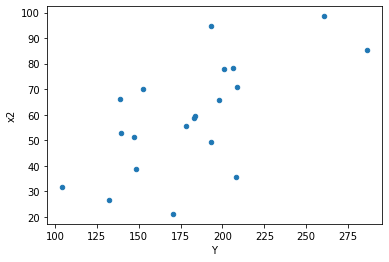

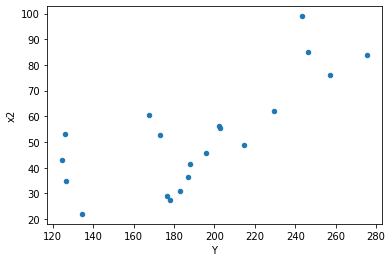

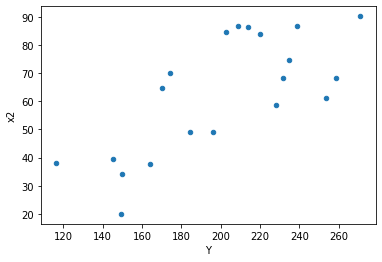

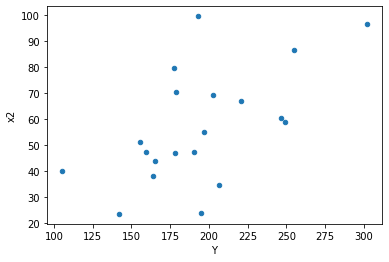

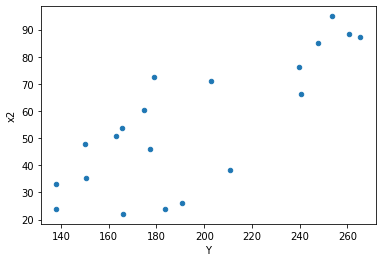

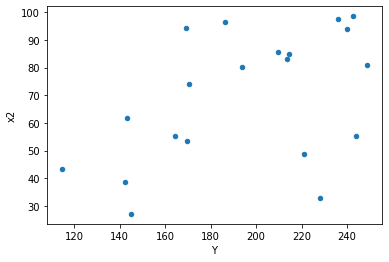

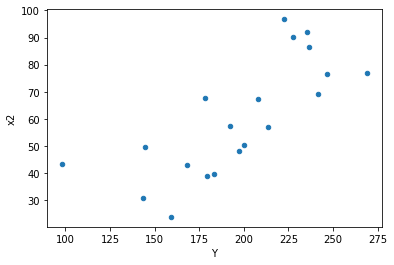

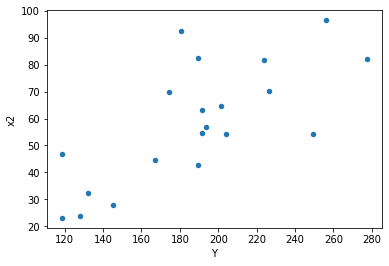

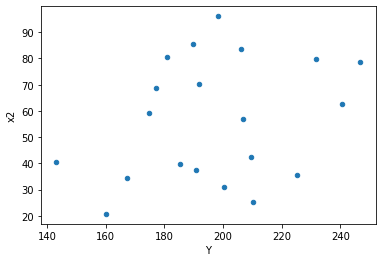

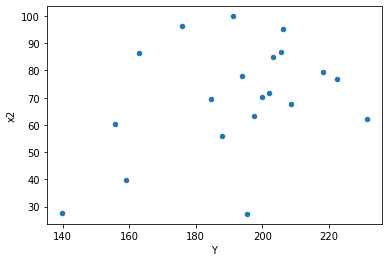

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,0.5417198260367376,4.850482101298258,0.10834396520734753,0.9700964202596516,8.953857452079507,0.031090463550687897,0.984454768224656,0.015545231775343948,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1.8535322575028754,5.372609779809375,0.3707064515005751,1.074521955961875,2.898579055239906,0.267698204923124,0.866150897538438,0.133849102461562,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.6670312034030669,1.1078094102039135,0.13340624068061338,0.2215618820407827,1.6608059781192839,0.5912717988894642,0.7043641005552679,0.2956358994447321,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,1.2864677032552827,2.65813328566709,0.25729354065105653,0.531626657133418,2.0662262091313597,0.44470476852358853,0.7776476157382057,0.22235238426179427,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,0.9072342222981092,1.1511936639078302,0.18144684445962184,0.23023873278156604,1.2689045845203557,0.8002087696965856,0.5998956151517072,0.4001043848482928,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,0.7902129231173609,1.1010590013721469,0.15804258462347218,0.22021180027442938,1.3933700261804245,0.7247302205106831,0.6376348897446584,0.36236511025534157,Reject005=1 : Homoscedasticity
15.0,5.0,5.0,2.334201725502155,4.880892086505109,0.466840345100431,0.9761784173010218,2.09103267861525,0.4374030784758569,0.7812984607620715,0.21870153923792846,Reject005=1 : Homoscedasticity
16.0,5.0,5.0,1.4019522470917205,2.063847873480024,0.2803904494183441,0.4127695746960048,1.472124230879741,0.6816637815621047,0.6591681092189476,0.34083189078105236,Reject005=1 : Homoscedasticity
17.0,5.0,5.0,0.9106434967131196,1.3193229196899579,0.18212869934262393,0.26386458393799156,1.4487809164090308,0.6940745514998694,0.6529627242500653,0.3470372757499347,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2.6983046176888705,2.153364841270745,0.5396609235377741,0.43067296825414897,0.7980436408677709,0.8105200669376892,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.5417198260367376,4.850482101298258,0.10834396520734753,0.9700964202596516,8.953857452079507,0.031090463550687897,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,1.7815784199426201,0.837274806800184,0.35631568398852403,0.1674549613600368,0.469962364512223,0.42686765605455484,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,1.8535322575028754,5.372609779809375,0.3707064515005751,1.074521955961875,2.898579055239906,0.267698204923124,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,1.0526169520955742,0.5757467282405702,0.21052339041911483,0.11514934564811403,0.5469669922134166,0.5238801075078722,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,2.079408562024334,2.06825847499922,0.4158817124048668,0.413651694999844,0.9946378565382749,0.9954362519774269,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.6670312034030669,1.1078094102039135,0.13340624068061338,0.2215618820407827,1.6608059781192839,0.5912717988894642,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,4.279941577853804,1.054833354931744,0.8559883155707608,0.21096667098634878,0.24645975552327393,0.1504525506103841,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,3.127946985878245,1.7379332955646913,0.625589397175649,0.3475866591129383,0.5556146902140433,0.5345822529909816,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      910
Reject005=0 : Heteroscedasticity     90
Name: Result_test, dtype: int64